<ipython-input-14-604c53b2380b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
<ipython-input-14-604c53b2380b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
<ipython-input-14-604c53b2380b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
<ipython-i

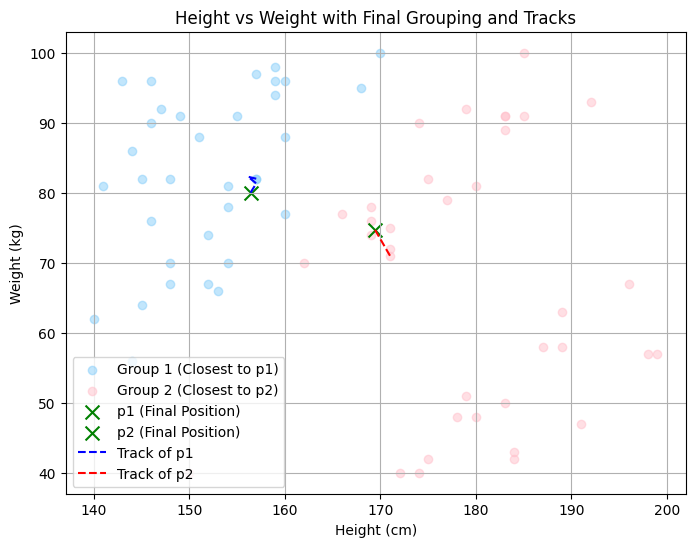

In [ ]:
### 分類version_1 - 小規模測試 ###

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# 讀取資料
file_path = "/content/bmi - bmi.csv"
data = pd.read_csv(file_path)

# 刪除「結果為正常」的數據
data = data[data['result'] != '正常']

# 定義距離計算函數
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# 定義更新中心點函數
def update_center_with_radius(center, radius, data):
    in_circle = []
    for _, row in data.iterrows():
        point = (row['height'], row['weight'])
        if distance(center, point) <= radius:
            in_circle.append(row)
    in_circle_df = pd.DataFrame(in_circle)
    if not in_circle_df.empty:
        return in_circle_df[['height', 'weight']].mean()
    return center  # 如果圓內沒有點，返回原中心點

# 隨機選取兩個點作為初始中心點

p1_idx, p2_idx = random.sample(range(len(data)), 2)
p1 = (data.iloc[p1_idx]['height'], data.iloc[p1_idx]['weight'])
p2 = (data.iloc[p2_idx]['height'], data.iloc[p2_idx]['weight'])

# 初始化變數
p1_positions = [p1]  # 儲存 p1 的歷史位置
p2_positions = [p2]  # 儲存 p2 的歷史位置

# 迭代更新中心點
for iteration in range(50):  # 最大迭代次數
    # 計算半徑
    radius = distance(p1, p2) / 2

    # 更新中心點
    p1 = update_center_with_radius(p1, radius, data)
    p2 = update_center_with_radius(p2, radius, data)

    # 儲存中心點的歷史位置
    p1_positions.append(p1)
    p2_positions.append(p2)

# 最終群組劃分
final_group_p1 = []
final_group_p2 = []

for _, row in data.iterrows():
    point = (row['height'], row['weight'])
    if distance(p1, point) < distance(p2, point):
        final_group_p1.append(row)
    else:
        final_group_p2.append(row)

final_group_p1 = pd.DataFrame(final_group_p1)
final_group_p2 = pd.DataFrame(final_group_p2)

# 繪製最終的散佈圖與中心點移動路徑
plt.figure(figsize=(8, 6))

# 繪製群組 1（p1 最接近）
plt.scatter(final_group_p1['height'], final_group_p1['weight'], c='lightskyblue', label='Group 1 (Closest to p1)', alpha=0.5)

# 繪製群組 2（p2 最接近）
plt.scatter(final_group_p2['height'], final_group_p2['weight'], c='pink', label='Group 2 (Closest to p2)', alpha=0.5)

# 繪製最終中心點
plt.scatter(p1[0], p1[1], c='green', marker='x', s=100, label='p1 (Final Position)')
plt.scatter(p2[0], p2[1], c='green', marker='x', s=100, label='p2 (Final Position)')

# 繪製中心點移動軌跡
p1_positions = np.array(p1_positions)
p2_positions = np.array(p2_positions)
plt.plot(p1_positions[:, 0], p1_positions[:, 1], color='blue', linestyle='--', label='Track of p1')
plt.plot(p2_positions[:, 0], p2_positions[:, 1], color='red', linestyle='--', label='Track of p2')

# 標題與標籤
plt.title('Height vs Weight with Final Grouping and Tracks')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

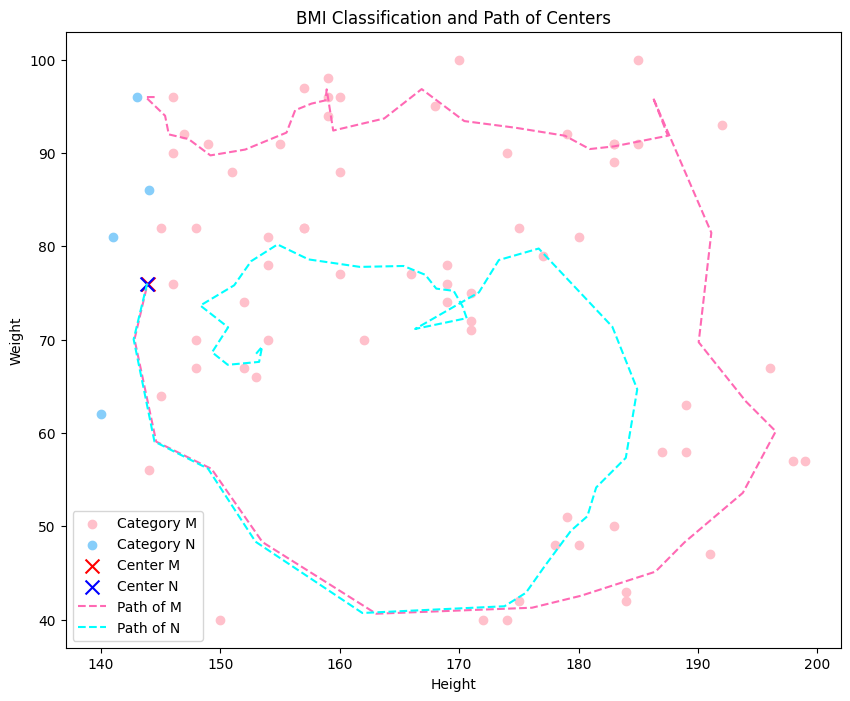

In [ ]:
### 分類version_2 - 小規模測試 ###


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# 讀取資料
file_path = "/content/bmi - bmi.csv"
data = pd.read_csv(file_path)

# 刪除「結果為正常」的數據
data = data[data['result'] != '正常']

# 提取特徵 (假設資料中有'height'和'weight'兩列)
points = data[['height', 'weight']].to_numpy()

# 定義距離計算函數
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# 隨機選擇初始點 A 和 B
A, B = random.sample(list(points), 2)

# 建立副本用於逐步刪除資料
remaining_points = points.copy()

# 記錄 M 和 N 的移動路徑
path_M = []
path_N = []

# 開始迭代
while len(remaining_points) > 2:
    # 計算與 A 最近的點 a
    distances_to_A = [(distance(A, p), p) for p in remaining_points if not np.array_equal(p, A) and not np.array_equal(p, B)]
    a = min(distances_to_A, key=lambda x: x[0])[1]

    # 計算與 B 最近的點 b
    distances_to_B = [(distance(B, p), p) for p in remaining_points if not np.array_equal(p, A) and not np.array_equal(p, B)]
    b = min(distances_to_B, key=lambda x: x[0])[1]

    # 計算中點 N 和 M
    N = [(A[0] + a[0]) / 2, (A[1] + a[1]) / 2]
    M = [(B[0] + b[0]) / 2, (B[1] + b[1]) / 2]

    # 記錄當前的 M 和 N
    path_M.append(M)
    path_N.append(N)

    # 更新 A 和 B
    A, B = N, M

    # 在副本中刪除 A、B、a、b
    remaining_points = [p for p in remaining_points if not np.array_equal(p, a) and not np.array_equal(p, b)]

# 最終分類（基於完整的原始數據 points）
categories = {'M': [], 'N': []}
for p in points:
    if distance(p, M) < distance(p, N):
        categories['M'].append(p)
    else:
        categories['N'].append(p)

# 視覺化結果
points_M = np.array(categories['M'])
points_N = np.array(categories['N'])

plt.figure(figsize=(10, 8))

# 畫出分類的點
plt.scatter(points_M[:, 0], points_M[:, 1], color='pink', label='Category M')
plt.scatter(points_N[:, 0], points_N[:, 1], color='lightskyblue', label='Category N')

# 畫出 M 和 N 的最終位置
plt.scatter(M[0], M[1], color='red', marker='x', s=100, label='Center M')
plt.scatter(N[0], N[1], color='blue', marker='x', s=100, label='Center N')

# 畫出 M 和 N 的移動路徑
path_M = np.array(path_M)
path_N = np.array(path_N)

plt.plot(path_M[:, 0], path_M[:, 1], color='hotpink', linestyle='--', label='Path of M')
plt.plot(path_N[:, 0], path_N[:, 1], color='aqua', linestyle='--', label='Path of N')

# 加入標籤和圖例
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('BMI Classification and Path of Centers')
plt.show()


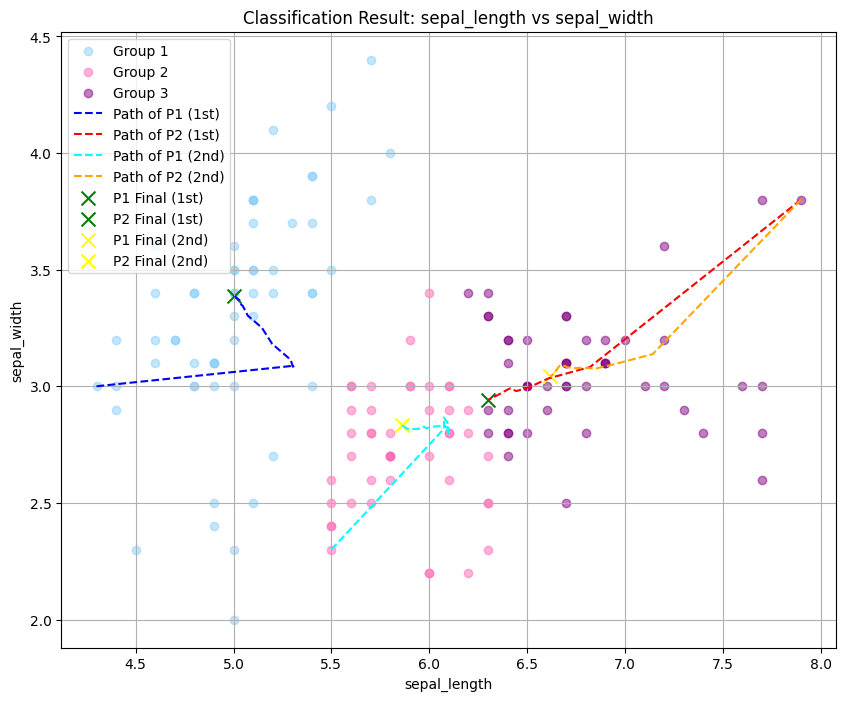

Success Rates for sepal_length vs sepal_width:
  Group 1: 0.88
  Group 2: 0.71
  Group 3: 0.75


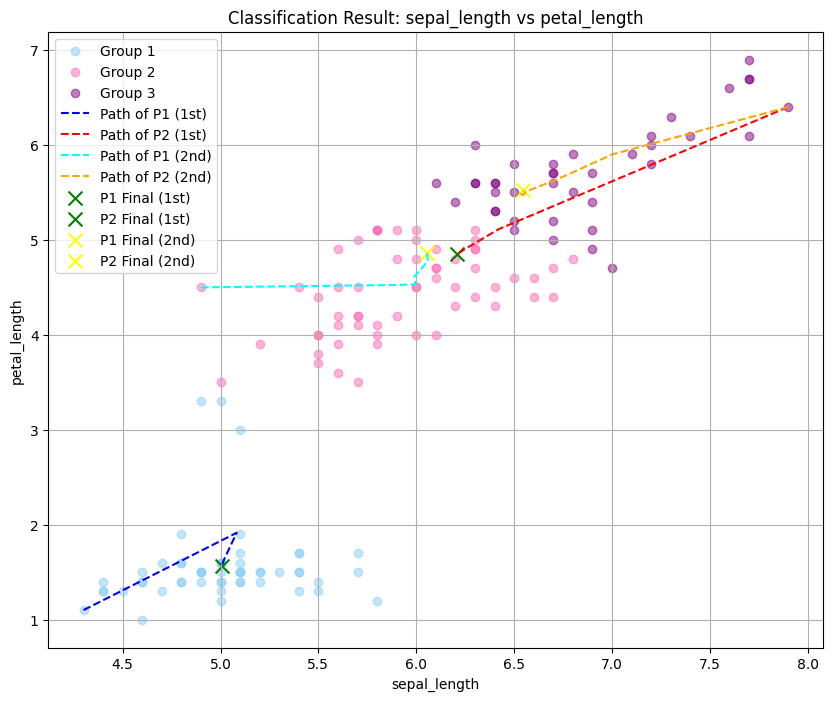

Success Rates for sepal_length vs petal_length:
  Group 1: 0.94
  Group 2: 0.76
  Group 3: 0.92


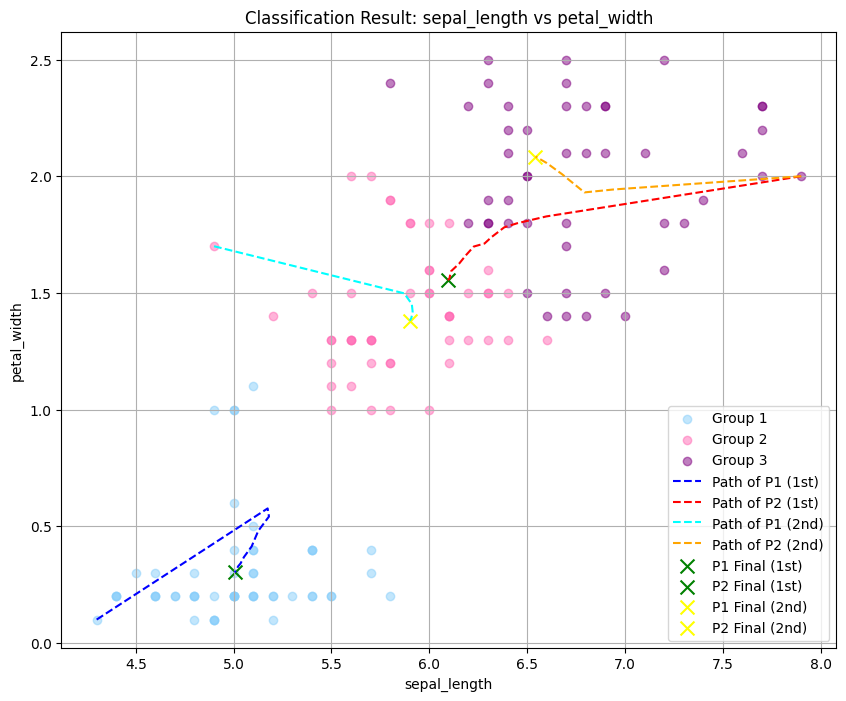

Success Rates for sepal_length vs petal_width:
  Group 1: 0.93
  Group 2: 0.78
  Group 3: 0.83


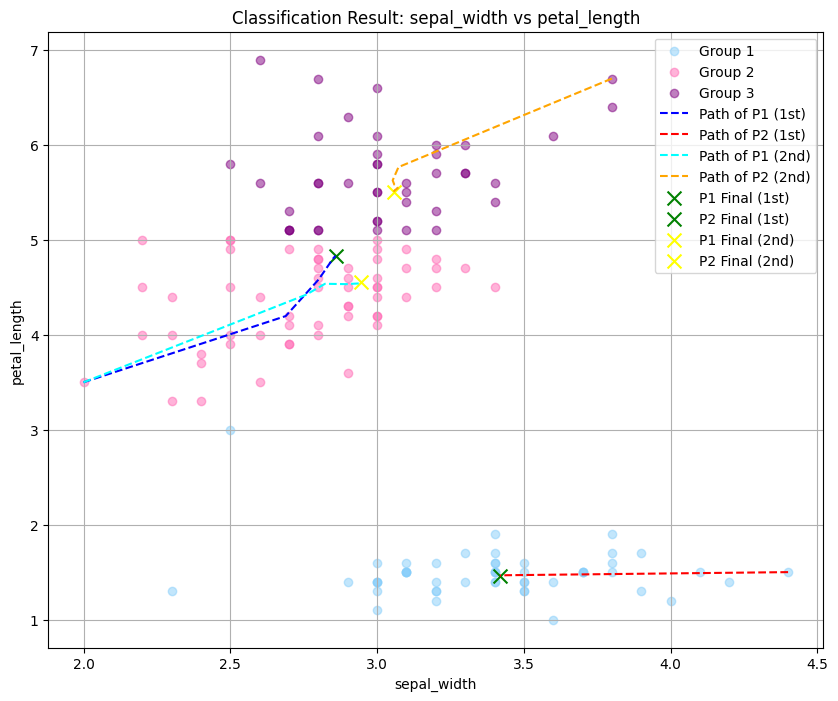

Success Rates for sepal_width vs petal_length:
  Group 1: 0.98
  Group 2: 0.84
  Group 3: 0.98


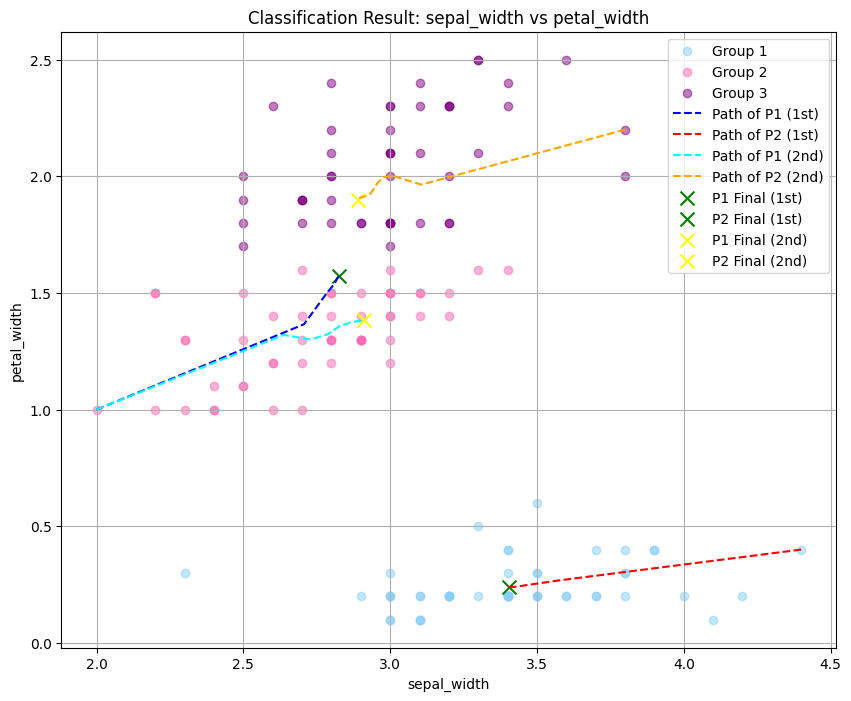

Success Rates for sepal_width vs petal_width:
  Group 1: 1.00
  Group 2: 0.92
  Group 3: 0.96


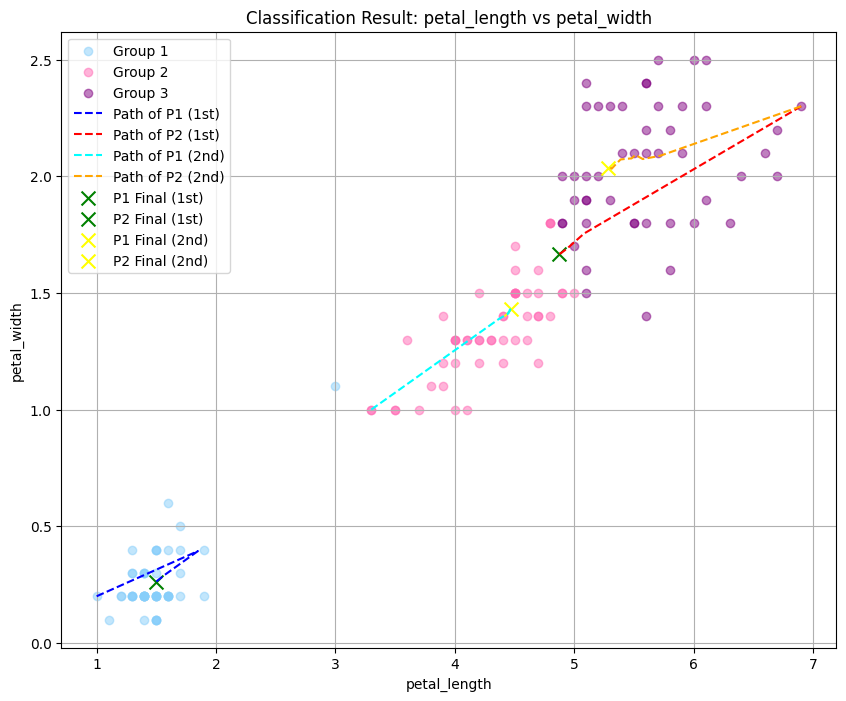

Success Rates for petal_length vs petal_width:
  Group 1: 0.98
  Group 2: 0.92
  Group 3: 0.96


In [ ]:
### 分類version_1 實做成果 ###


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
file_path = "/content/IRIS.csv"
data = pd.read_csv(file_path)

# 定義距離計算函數
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 定義更新中心點函數
def update_center_with_radius(center, radius, data, feature_x, feature_y):
    in_circle = []
    for _, row in data.iterrows():
        point = (row[feature_x], row[feature_y])
        if distance(center, point) <= radius:
            in_circle.append(row)
    in_circle_df = pd.DataFrame(in_circle)
    if not in_circle_df.empty:
        return (
            in_circle_df[feature_x].mean(),
            in_circle_df[feature_y].mean()
        )
    return center

# 選擇最左下角與最右上角點
def get_corners(data, feature_x, feature_y):
    left_bottom = (
        data[feature_x].min(),
        data.loc[data[feature_x].idxmin(), feature_y]
    )
    right_top = (
        data[feature_x].max(),
        data.loc[data[feature_x].idxmax(), feature_y]
    )
    return left_bottom, right_top

# 計算分類成功率
def calculate_success_rate(group, label_column):
    if group.empty:
        return 0.0
    label_counts = group[label_column].value_counts()
    return label_counts.max() / len(group)

# 分類函數
def classify_and_plot(data, feature_x, feature_y, fig_num):
    p1, p2 = get_corners(data, feature_x, feature_y)
    p1_positions = [p1]
    p2_positions = [p2]

    # 第一次分類
    for _ in range(50):  # 最大迭代次數
        radius = distance(p1, p2) / 2
        new_p1 = update_center_with_radius(p1, radius, data, feature_x, feature_y)
        new_p2 = update_center_with_radius(p2, radius, data, feature_x, feature_y)
        if new_p1 == p1 and new_p2 == p2:  # 收斂
            break
        p1, p2 = new_p1, new_p2
        p1_positions.append(p1)
        p2_positions.append(p2)

    # 根據距離分類
    group1 = []
    group2 = []
    for _, row in data.iterrows():
        point = (row[feature_x], row[feature_y])
        if distance(p1, point) < distance(p2, point):
            group1.append(row)
        else:
            group2.append(row)
    group1 = pd.DataFrame(group1)
    group2 = pd.DataFrame(group2)

    if len(group1) > len(group2):
      group1, group2 = group2, group1


    # 第二次分類
    if len(group1) > len(group2):
        target_group = group1
    else:
        target_group = group2
    new_p1, new_p2 = get_corners(target_group, feature_x, feature_y)
    new_p1_positions = [new_p1]
    new_p2_positions = [new_p2]

    for _ in range(50):
        radius = distance(new_p1, new_p2) / 2
        updated_p1 = update_center_with_radius(new_p1, radius, target_group, feature_x, feature_y)
        updated_p2 = update_center_with_radius(new_p2, radius, target_group, feature_x, feature_y)
        if updated_p1 == new_p1 and updated_p2 == new_p2:  # 收斂
            break
        new_p1, new_p2 = updated_p1, updated_p2
        new_p1_positions.append(new_p1)
        new_p2_positions.append(new_p2)

    group3 = []
    group4 = []
    for _, row in target_group.iterrows():
        point = (row[feature_x], row[feature_y])
        if distance(new_p1, point) < distance(new_p2, point):
            group3.append(row)
        else:
            group4.append(row)
    group3 = pd.DataFrame(group3)
    group4 = pd.DataFrame(group4)

    # 繪圖
    plt.figure(figsize=(10, 8))
    plt.scatter(group1[feature_x], group1[feature_y], c='lightskyblue', label='Group 1', alpha=0.5)
    plt.scatter(group3[feature_x], group3[feature_y], c='hotpink', label='Group 2', alpha=0.5)
    plt.scatter(group4[feature_x], group4[feature_y], c='purple', label='Group 3', alpha=0.5)
    plt.plot(*zip(*p1_positions), color='blue', linestyle='--', label='Path of P1 (1st)')
    plt.plot(*zip(*p2_positions), color='red', linestyle='--', label='Path of P2 (1st)')
    plt.plot(*zip(*new_p1_positions), color='cyan', linestyle='--', label='Path of P1 (2nd)')
    plt.plot(*zip(*new_p2_positions), color='orange', linestyle='--', label='Path of P2 (2nd)')
    plt.scatter(p1[0], p1[1], c='green', marker='x', s=100, label='P1 Final (1st)')
    plt.scatter(p2[0], p2[1], c='green', marker='x', s=100, label='P2 Final (1st)')
    plt.scatter(new_p1[0], new_p1[1], c='yellow', marker='x', s=100, label='P1 Final (2nd)')
    plt.scatter(new_p2[0], new_p2[1], c='yellow', marker='x', s=100, label='P2 Final (2nd)')
    plt.title(f'Classification Result: {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'(1) {feature_x} vs {feature_y}.png')
    plt.show()

    # 計算成功率
    success_rate1 = calculate_success_rate(group1, 'species')
    success_rate2 = calculate_success_rate(group3, 'species')
    success_rate3 = calculate_success_rate(group4, 'species')
    print(f"Success Rates for {feature_x} vs {feature_y}:")
    print(f"  Group 1: {success_rate1:.2f}")
    print(f"  Group 2: {success_rate2:.2f}")
    print(f"  Group 3: {success_rate3:.2f}")

# 主程式：進行所有組合的分類
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
combinations = [
    (features[0], features[1]),
    (features[0], features[2]),
    (features[0], features[3]),
    (features[1], features[2]),
    (features[1], features[3]),
    (features[2], features[3])
]

for i, (feature_x, feature_y) in enumerate(combinations, 1):
    classify_and_plot(data, feature_x, feature_y, i)


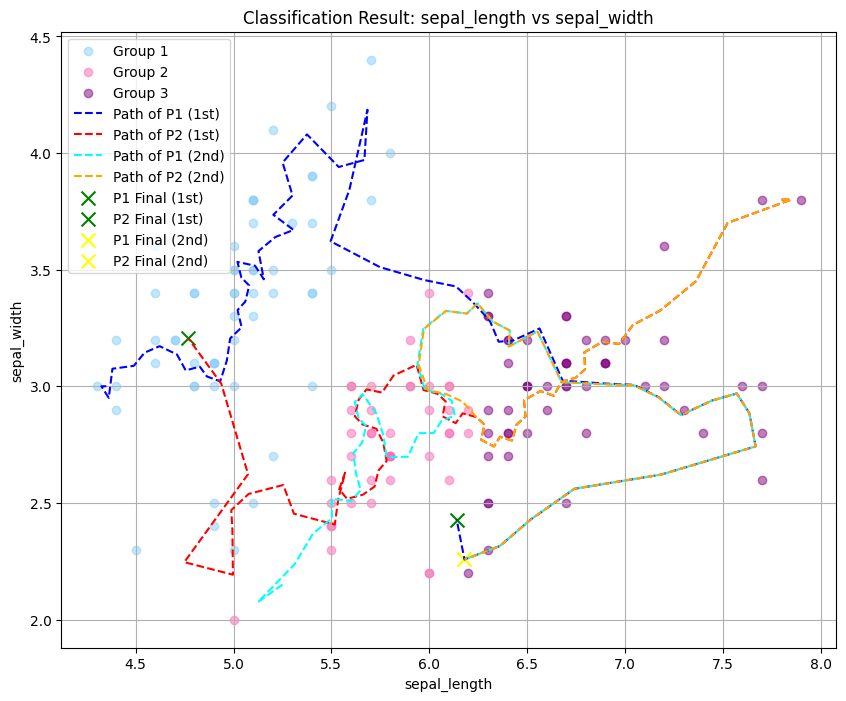

Success Rates for sepal_length vs sepal_width:
  Group 1: 0.89
  Group 2: 0.71
  Group 3: 0.71


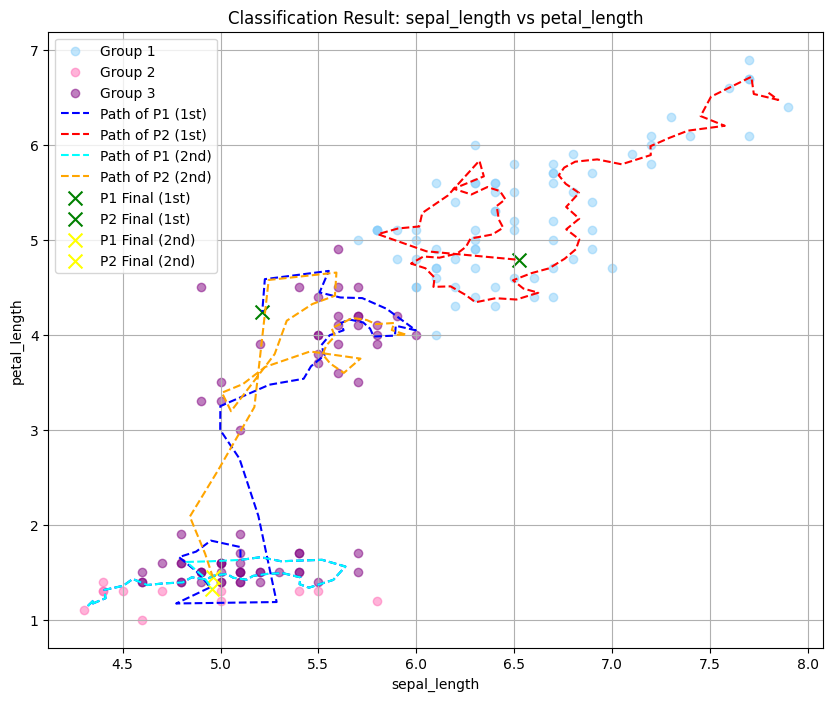

Success Rates for sepal_length vs petal_length:
  Group 1: 0.67
  Group 2: 1.00
  Group 3: 0.58


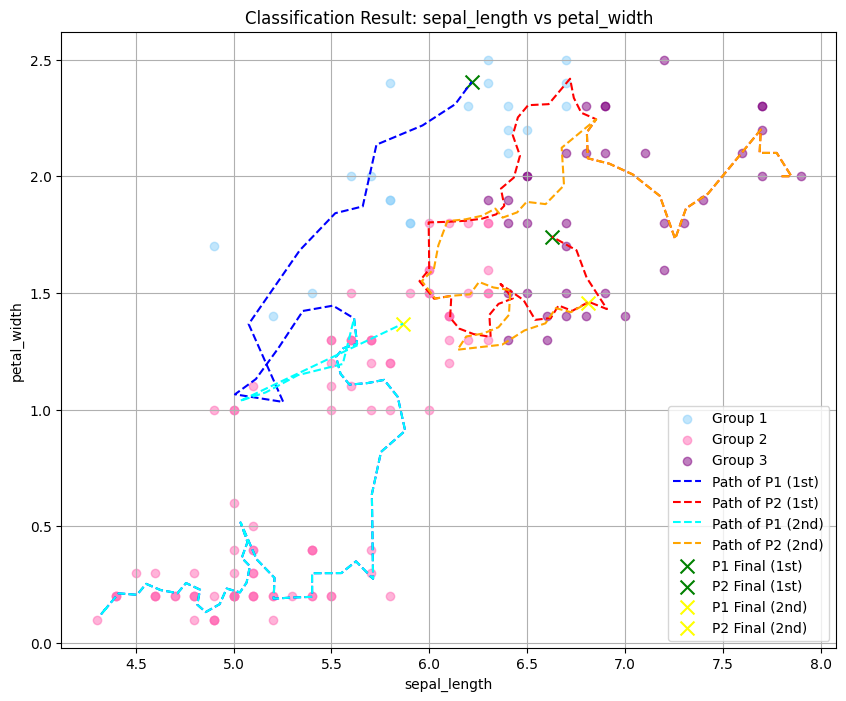

Success Rates for sepal_length vs petal_width:
  Group 1: 0.85
  Group 2: 0.53
  Group 3: 0.69


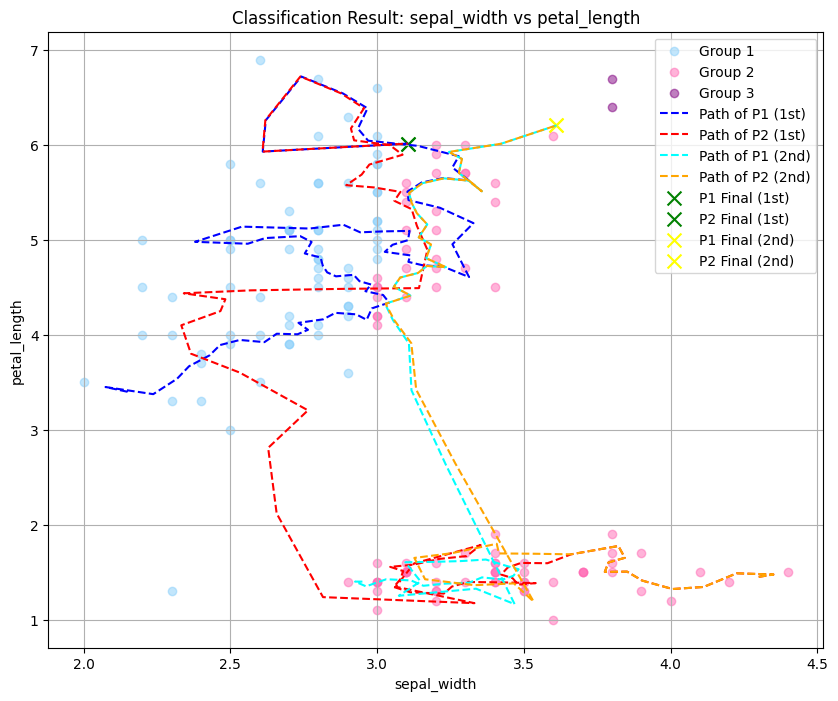

Success Rates for sepal_width vs petal_length:
  Group 1: 0.51
  Group 2: 0.62
  Group 3: 1.00


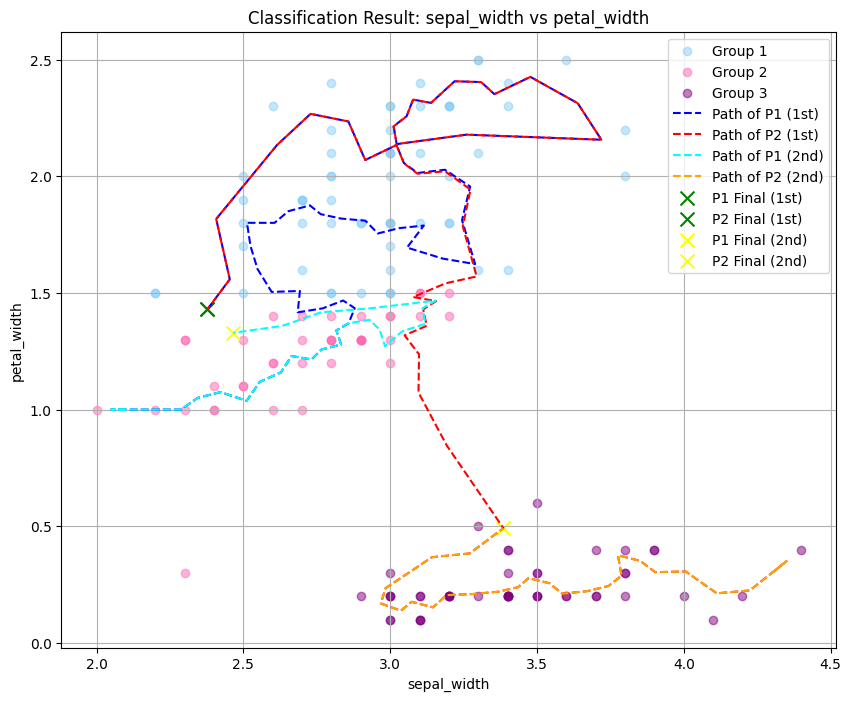

Success Rates for sepal_width vs petal_width:
  Group 1: 0.80
  Group 2: 0.95
  Group 3: 1.00


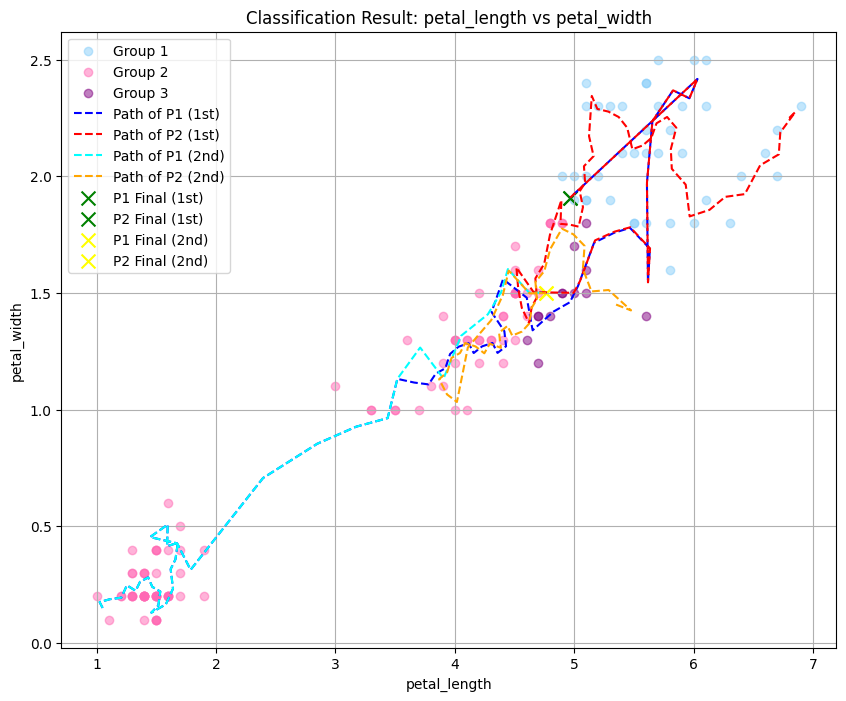

Success Rates for petal_length vs petal_width:
  Group 1: 1.00
  Group 2: 0.52
  Group 3: 0.69


In [ ]:
### 分類version_2 實做成果 ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
file_path = "/content/IRIS.csv"  # 請將此替換為您的資料路徑
data = pd.read_csv(file_path)

# 定義距離計算函數
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 選擇最左下角與最右上角點
def get_corners(data, feature_x, feature_y):
    left_bottom = (
        data[feature_x].min(),
        data.loc[data[feature_x].idxmin(), feature_y]
    )
    right_top = (
        data[feature_x].max(),
        data.loc[data[feature_x].idxmax(), feature_y]
    )
    return left_bottom, right_top

# 根據最近點更新中心點
def update_centers(A, B, remaining_points):
    # 計算與 A 最近的點 a
    distances_to_A = [(distance(A, p), p) for p in remaining_points if not np.array_equal(p, A) and not np.array_equal(p, B)]
    a = min(distances_to_A, key=lambda x: x[0])[1]

    # 計算與 B 最近的點 b
    distances_to_B = [(distance(B, p), p) for p in remaining_points if not np.array_equal(p, A) and not np.array_equal(p, B)]
    b = min(distances_to_B, key=lambda x: x[0])[1]

    # 計算中點 M 和 N
    M = [(A[0] + a[0]) / 2, (A[1] + a[1]) / 2]
    N = [(B[0] + b[0]) / 2, (B[1] + b[1]) / 2]

    return M, N, [a, b]

# 計算分類成功率
def calculate_success_rate(group, label_column):
    if group.empty:
        return 0.0
    label_counts = group[label_column].value_counts()
    return label_counts.max() / len(group)

# 分類與繪圖函數
def classify_and_plot(data, feature_x, feature_y, fig_num):
    # 初始點選擇
    p1, p2 = get_corners(data, feature_x, feature_y)
    remaining_points = data[[feature_x, feature_y]].to_numpy()

    # 記錄第一次分類的路徑與中心
    path_M1, path_N1 = [], []

    # 第一次分類迭代
    while len(remaining_points) > 2:
        M, N, removed_points = update_centers(p1, p2, remaining_points)
        path_M1.append(M)
        path_N1.append(N)
        remaining_points = [
            p for p in remaining_points
            if not any(np.array_equal(p, removed_point) for removed_point in removed_points)
        ]
        p1, p2 = M, N

    # 第一次分類結果
    group1, group2 = [], []
    for _, row in data.iterrows():
        point = (row[feature_x], row[feature_y])
        if distance(point, p1) < distance(point, p2):
            group1.append(row)
        else:
            group2.append(row)

    group1 = pd.DataFrame(group1)
    group2 = pd.DataFrame(group2)

    if len(group1) > len(group2):
      group1, group2 = group2, group1


    # 選擇需要再次分類的群組
    target_group = group1 if len(group1) > len(group2) else group2

    # 第二次分類的初始點選擇
    p3, p4 = get_corners(target_group, feature_x, feature_y)
    remaining_points = target_group[[feature_x, feature_y]].to_numpy()

    # 記錄第二次分類的路徑與中心
    path_M2, path_N2 = [], []

    # 第二次分類迭代
    while len(remaining_points) > 2:
        M, N, removed_points = update_centers(p3, p4, remaining_points)
        path_M2.append(M)
        path_N2.append(N)
        remaining_points = [
            p for p in remaining_points
            if not any(np.array_equal(p, removed_point) for removed_point in removed_points)
        ]
        p3, p4 = M, N

    # 第二次分類結果
    group3, group4 = [], []
    for _, row in target_group.iterrows():
        point = (row[feature_x], row[feature_y])
        if distance(point, p3) < distance(point, p4):
            group3.append(row)
        else:
            group4.append(row)

    group3 = pd.DataFrame(group3)
    group4 = pd.DataFrame(group4)

    # 繪圖
    plt.figure(figsize=(10, 8))
    plt.scatter(group1[feature_x], group1[feature_y], c='lightskyblue', label='Group 1', alpha=0.5)
    plt.scatter(group3[feature_x], group3[feature_y], c='hotpink', label='Group 2', alpha=0.5)
    plt.scatter(group4[feature_x], group4[feature_y], c='purple', label='Group 3', alpha=0.5)
    plt.plot(*zip(*path_M1), color='blue', linestyle='--', label='Path of P1 (1st)')
    plt.plot(*zip(*path_N1), color='red', linestyle='--', label='Path of P2 (1st)')
    plt.plot(*zip(*path_M2), color='cyan', linestyle='--', label='Path of P1 (2nd)')
    plt.plot(*zip(*path_N2), color='orange', linestyle='--', label='Path of P2 (2nd)')
    plt.scatter(p1[0], p1[1], c='green', marker='x', s=100, label='P1 Final (1st)')
    plt.scatter(p2[0], p2[1], c='green', marker='x', s=100, label='P2 Final (1st)')
    plt.scatter(p3[0], p3[1], c='yellow', marker='x', s=100, label='P1 Final (2nd)')
    plt.scatter(p4[0], p4[1], c='yellow', marker='x', s=100, label='P2 Final (2nd)')
    plt.title(f'Classification Result: {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'(2) {feature_x} vs {feature_y}.png')
    plt.show()

    # 計算成功率
    success_rate1 = calculate_success_rate(group1, 'species')
    success_rate2 = calculate_success_rate(group3, 'species')
    success_rate3 = calculate_success_rate(group4, 'species')
    print(f"Success Rates for {feature_x} vs {feature_y}:")
    print(f"  Group 1: {success_rate1:.2f}")
    print(f"  Group 2: {success_rate2:.2f}")
    print(f"  Group 3: {success_rate3:.2f}")

# 主程式：進行所有組合的分類
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
combinations = [
    (features[0], features[1]),
    (features[0], features[2]),
    (features[0], features[3]),
    (features[1], features[2]),
    (features[1], features[3]),
    (features[2], features[3])
]

for i, (feature_x, feature_y) in enumerate(combinations, 1):
    classify_and_plot(data, feature_x, feature_y, i)
